# 从模式数据中读取单点的时间序列

In [1]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime
import xarray as xr
import numpy as np
import pandas as pd
from nmc_met_io.retrieve_micaps_server import get_model_grid, get_model_points, get_model_3D_grid, get_model_3D_grids
from nmc_met_io.utility import get_filenames

## 读取统一起报时间的多个预报时刻格点场

In [3]:
dataDir = "NWFD_SCMOC/TMP/2M_ABOVE_GROUND"

In [4]:
fhours = np.arange(3, 75, 3)
filenames = ["19083008."+str(fhour).zfill(3) for fhour in fhours]

In [5]:
points = {'lon':[116.3833, 110.0], 'lat':[39.9, 32]}

In [6]:
data = get_model_points(dataDir, filenames, points)

In [7]:
data

<xarray.Dataset>
Dimensions:                  (level: 1, points: 2, time: 24)
Coordinates:
  * level                    (level) float64 2.0
    forecast_reference_time  datetime64[ns] 2019-08-30T08:00:00
  * time                     (time) datetime64[ns] 2019-08-30T11:00:00 ... 2019-09-02T08:00:00
    forecast_period          (time) float64 3.0 6.0 9.0 12.0 ... 66.0 69.0 72.0
    lon                      (points) float64 116.4 110.0
    lat                      (points) float64 39.9 32.0
Dimensions without coordinates: points
Data variables:
    data                     (time, level, points) float64 30.34 25.6 ... 16.65
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server

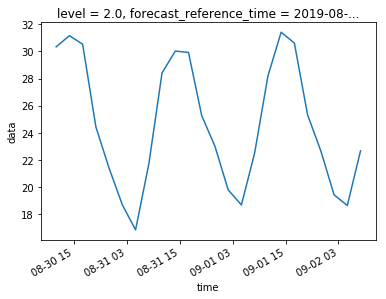

In [9]:
data['data'][:,0,0].plot()

In [3]:
data_ens = get_model_grid('ECMWF_ENSEMBLE/RAW/TMP_2M', '19083008.024')

In [4]:
data_ens

<xarray.Dataset>
Dimensions:                  (lat: 161, lon: 281, number: 51, time: 1)
Coordinates:
  * time                     (time) datetime64[ns] 2019-08-31T08:00:00
  * number                   (number) int64 0 1 2 3 4 5 6 ... 45 46 47 48 49 50
  * lat                      (lat) float64 70.0 69.5 69.0 ... -9.0 -9.5 -10.0
  * lon                      (lon) float64 40.0 40.5 41.0 ... 179.0 179.5 180.0
    forecast_reference_time  datetime64[ns] 2019-08-30T08:00:00
    forecast_period          (time) float64 24.0
Data variables:
    data                     (time, number, lat, lon) float64 10.33 ... 26.84
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server

In [3]:
filenames = get_filenames('19090108', fhours="0/241/6")
points = {'lon':[116.3833,], 'lat':[39.9,]}
eps_point = get_model_points("ECMWF_ENSEMBLE/RAW/TMP_2M", filenames, points)

In [18]:
np.squeeze(eps_point['data'].values).shape

(41, 51)

In [8]:
eps_point.coords['time'].values.astype('M8[ms]').astype('O').tolist()

[datetime.datetime(2019, 9, 1, 8, 0),
 datetime.datetime(2019, 9, 1, 14, 0),
 datetime.datetime(2019, 9, 1, 20, 0),
 datetime.datetime(2019, 9, 2, 2, 0),
 datetime.datetime(2019, 9, 2, 8, 0),
 datetime.datetime(2019, 9, 2, 14, 0),
 datetime.datetime(2019, 9, 2, 20, 0),
 datetime.datetime(2019, 9, 3, 2, 0),
 datetime.datetime(2019, 9, 3, 8, 0),
 datetime.datetime(2019, 9, 3, 14, 0),
 datetime.datetime(2019, 9, 3, 20, 0),
 datetime.datetime(2019, 9, 4, 2, 0),
 datetime.datetime(2019, 9, 4, 8, 0),
 datetime.datetime(2019, 9, 4, 14, 0),
 datetime.datetime(2019, 9, 4, 20, 0),
 datetime.datetime(2019, 9, 5, 2, 0),
 datetime.datetime(2019, 9, 5, 8, 0),
 datetime.datetime(2019, 9, 5, 14, 0),
 datetime.datetime(2019, 9, 5, 20, 0),
 datetime.datetime(2019, 9, 6, 2, 0),
 datetime.datetime(2019, 9, 6, 8, 0),
 datetime.datetime(2019, 9, 6, 14, 0),
 datetime.datetime(2019, 9, 6, 20, 0),
 datetime.datetime(2019, 9, 7, 2, 0),
 datetime.datetime(2019, 9, 7, 8, 0),
 datetime.datetime(2019, 9, 7, 14, 0),

In [8]:
datetime.utcfromtimestamp(eps_point.coords['time'].values/1e9)

TypeError: ufunc true_divide cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [42]:
np.datetime64(datetime.utcnow())

numpy.datetime64('2019-09-01T09:13:41.291957')

In [35]:
np.__version__

'1.16.2'

## 读取三维空间网格预报

In [10]:
directory = "ECMWF_HR/TMP"
levels = [1000, 950, 925, 900, 850, 800, 700, 600, 500, 400, 300, 250, 200, 100]
filename = "19083008.024"

In [11]:
%%time
data = get_model_3D_grid(directory, filename, levels)

CPU times: user 92.3 ms, sys: 7.25 ms, total: 99.5 ms
Wall time: 1.54 s


In [13]:
data

<xarray.Dataset>
Dimensions:                  (lat: 281, level: 14, lon: 361, time: 1)
Coordinates:
  * time                     (time) datetime64[ns] 2019-08-31T08:00:00
  * lat                      (lat) float64 60.0 59.75 59.5 ... -9.5 -9.75 -10.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2019-08-30T08:00:00
    forecast_period          (time) float64 24.0
  * level                    (level) float64 1e+03 950.0 925.0 ... 200.0 100.0
Data variables:
    data                     (time, level, lat, lon) float32 6.43375 ... -78.49701
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server

In [6]:
fhours = np.arange(0, 75, 3)
filenames = ["19083008."+str(fhour).zfill(3) for fhour in fhours]

In [15]:
%%time
data =  get_model_3D_grids(directory, filenames, levels)

CPU times: user 1.99 s, sys: 269 ms, total: 2.26 s
Wall time: 13.9 s


In [14]:
data

<xarray.Dataset>
Dimensions:                  (lat: 281, level: 14, lon: 361, time: 1)
Coordinates:
  * time                     (time) datetime64[ns] 2019-08-31T08:00:00
  * lat                      (lat) float64 60.0 59.75 59.5 ... -9.5 -9.75 -10.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2019-08-30T08:00:00
    forecast_period          (time) float64 24.0
  * level                    (level) float64 1e+03 950.0 925.0 ... 200.0 100.0
Data variables:
    data                     (time, level, lat, lon) float32 6.43375 ... -78.49701
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server

In [9]:
np.arange(6, 25, 6)

array([ 6, 12, 18, 24])